# Univariate Time Series Forecasting using ARIMA & SARIMAX

## Problem Statement

- To forecast the sales for Grocery Store for the next 12 months

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# To get the style of the plots
print(plt.style.available)
plt.style.use("seaborn-v0_8-darkgrid")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
# load the data
df = pd.read_csv("Grocery-Store-Sales-Time-Series-Dataset.csv",skiprows = 8,names = ["date","sales"])
df.head()

,date,sales
0,2021-01-01,63473.0
1,2021-02-01,57967.0
2,2021-03-01,63609.0
3,2021-04-01,62593.0
4,2021-05-01,66993.0


In [3]:
# To get the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    60 non-null     object 
 1   sales   51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Drop null values present in the dataset
df.dropna(inplace = True)

In [5]:
# To get number of rows and columns present
df.shape

(51, 2)

In [6]:
# Check first few rows of dataset
df.head()

,date,sales
0,2021-01-01,63473.0
1,2021-02-01,57967.0
2,2021-03-01,63609.0
3,2021-04-01,62593.0
4,2021-05-01,66993.0


In [7]:
# Check last few rows of dataset
df.tail()

,date,sales
46,2024-11-01,76232.0
47,2024-12-01,78601.0
48,2025-01-01,76065.0
49,2025-02-01,69314.0
50,2025-03-01,75275.0


In [8]:
# Checking the index column
df.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype='int64')

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
# Setting the date as the index column
df.set_index("date",inplace = True)

In [11]:
df.columns

Index(['sales'], dtype='object')

In [12]:
df.head()

,sales
date,
2021-01-01,63473.0
2021-02-01,57967.0
2021-03-01,63609.0
2021-04-01,62593.0
2021-05-01,66993.0


# Checking the stationarity of given series
- Mean and Variance should be constant over time.

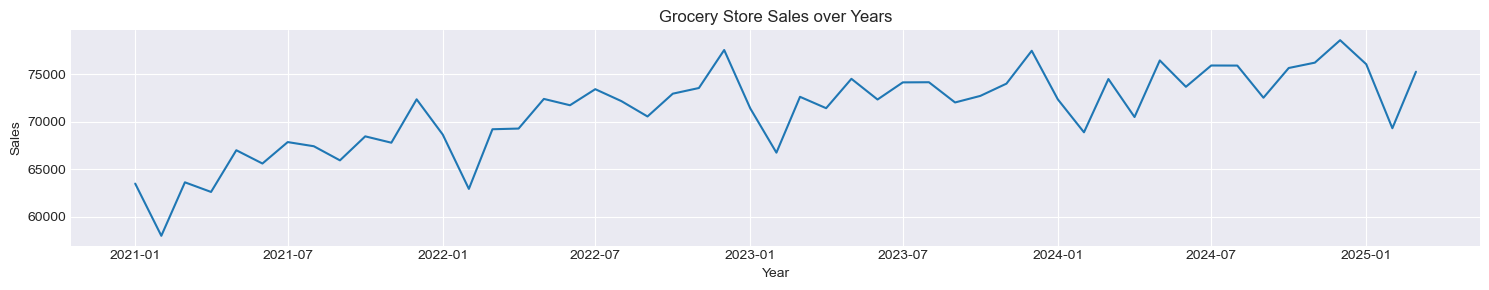

In [41]:
# Plotting the sales trend over years
plt.figure(figsize=(15,3))
plt.plot(df["sales"])
plt.title("Grocery Store Sales over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

Trend Component is present. Seasonality is present. Series is not stationary.

# How to make the series stationary?
- Use Differencing technique

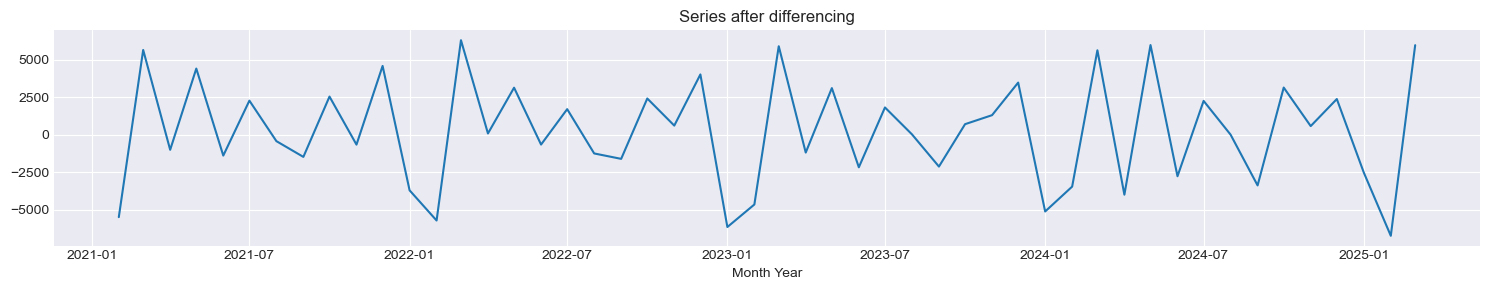

In [40]:
# Taking 1st level of differencing
df1 = df.diff()
df1.dropna(inplace = True)

# Plotting the sales trend over years
plt.figure(figsize=(15,3))
plt.plot(df1["sales"])
plt.title("Series after differencing")
plt.xlabel("Month Year")
plt.tight_layout()
plt.show()

Series is Stationary after taking 1st level of differencing.

## Univariate Time Series Models

- **ARIMA** stands for AutoRegressive Integrated Moving Average  
- **SARIMAX** stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous variables

> **AR (AutoRegressive) (p):** The model uses past values (lags) of the time series as predictors.  
>  
> **I (Integrated) (d):** Differencing the time series data to make it stationary.  
>  
> **MA (Moving Average) (q):** Modeling the error term as a linear combination of past error terms.

## Selecting ARIMA Parameters (p, d, q)

- **p (AR order):** Identified using the PACF plot  
- **q (MA order):** Identified using the ACF plot  
- **d (Differencing order):** Set to 1 since first-order differencing made the series stationary

PACF and ACF plots are used to estimate suitable values of p and q.

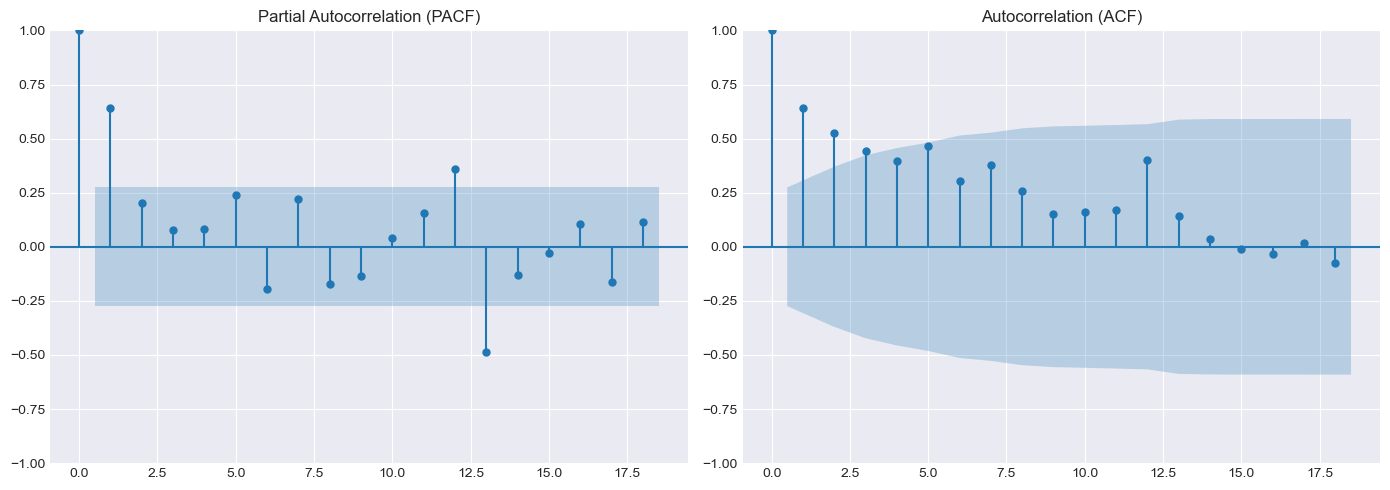

In [15]:
# Import plot_acf, plot_pacf functions from statsmodels library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a 1-row, 2-column subplot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot PACF on the first subplot
plot_pacf(df["sales"], ax=ax[0])
ax[0].set_title("Partial Autocorrelation (PACF)")

# Plot ACF on the second subplot
plot_acf(df["sales"], ax=ax[1])
ax[1].set_title("Autocorrelation (ACF)")

plt.tight_layout()
plt.show()

p = 1, d = 1, q = 1

We will build the model on training data, and on testing data we will test the model and then we will compare actual and predicted values.

In [16]:
# Splitting yhe DataFrame into training and testing datasets
train_df = df[:-12]
test_df = df[-12:]

# Building ARIMA Model on Training Data

In [17]:
# Import ARIMA class from statsmodels library
from statsmodels.tsa.arima.model import ARIMA

# Create instance of ARIMA class
model_arima = ARIMA(train_df,order=(1,1,1))

# Build the ARIMA Model
model_fit = model_arima.fit()

C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
# Summary function will help to have closer look at stastical values
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -363.220
Date:                Sat, 14 Feb 2026   AIC                            732.440
Time:                        14:52:21   BIC                            737.352
Sample:                    01-01-2021   HQIC                           734.188
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.026     38.531      0.000       0.949       1.051
ma.L1         -0.9997      0.329     -3.042      0.002      -1.644      -0.356
sigma2      1.178e+07   3.02e-08    3.9e+14      0.0

In [19]:
# Forecasting the next 12 months
n_forecast = 12

# Getting predictions for the forecast period (predictions for testing data)
predict = model_fit.predict(start = len(train_df), end = len(train_df) + n_forecast - 1)

# Renaming series for clarity
predict.rename("predicted", inplace=True)

predict

2024-04-01    74708.459897
2024-05-01    74910.917710
2024-06-01    75113.373441
2024-07-01    75315.827088
2024-08-01    75518.278652
2024-09-01    75720.728134
2024-10-01    75923.175533
2024-11-01    76125.620848
2024-12-01    76328.064081
2025-01-01    76530.505231
2025-02-01    76732.944298
2025-03-01    76935.381282
Freq: MS, Name: predicted, dtype: float64

In [20]:
# Creating new dataframe to store predictions
pred_df = pd.DataFrame(predict)

# Renaming columns for clarity
pred_df.columns = ["predicted_sales"]

# Rounding off values to zero decimal places
pred_df["predicted_sales"] = round(pred_df["predicted_sales"], 0)
pred_df.index = test_df.index

pred_df

,predicted_sales
date,
2024-04-01,74708.0
2024-05-01,74911.0
2024-06-01,75113.0
2024-07-01,75316.0
2024-08-01,75518.0
2024-09-01,75721.0
2024-10-01,75923.0
2024-11-01,76126.0
2024-12-01,76328.0


In [21]:
# Creating new dataframe to store actual test data along with predictions by ARIMA model
actual_vs_pred = pd.concat([test_df, pred_df], axis=1)

# Checking error in actual and predicted values
actual_vs_pred["error"] = actual_vs_pred["sales"] - actual_vs_pred["predicted_sales"]

# Renaming columns for clarity
actual_vs_pred.rename(columns={"sales": "actual_sales"}, inplace=True)

actual_vs_pred

,actual_sales,predicted_sales,error
date,,,
2024-04-01,70496.0,74708.0,-4212.0
2024-05-01,76465.0,74911.0,1554.0
2024-06-01,73686.0,75113.0,-1427.0
2024-07-01,75931.0,75316.0,615.0
2024-08-01,75923.0,75518.0,405.0
2024-09-01,72532.0,75721.0,-3189.0
2024-10-01,75667.0,75923.0,-256.0
2024-11-01,76232.0,76126.0,106.0
2024-12-01,78601.0,76328.0,2273.0


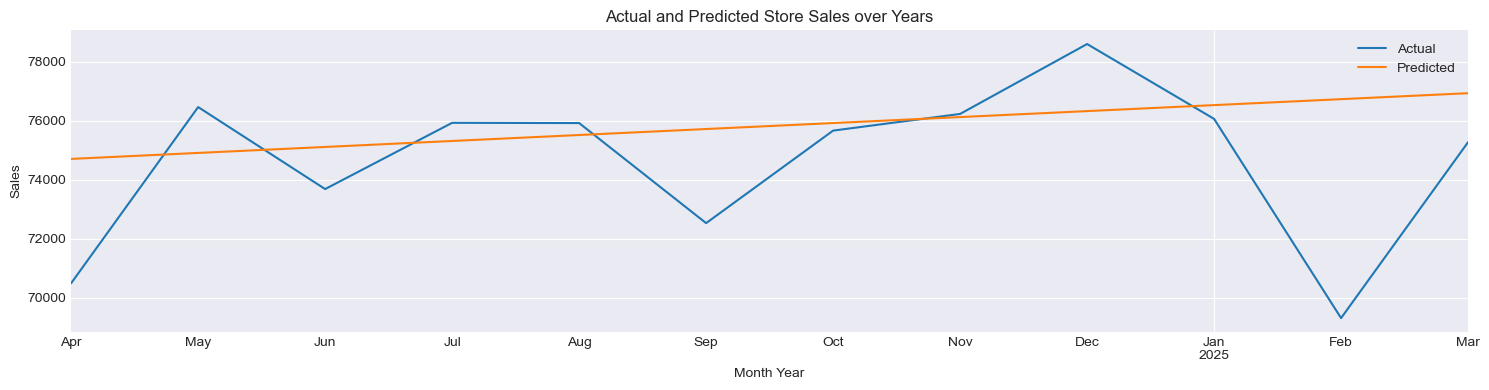

In [39]:
# Plotting actual and predicted sales for test data for comparision
plt.figure(figsize=(15,4))
actual_vs_pred["actual_sales"].plot()
actual_vs_pred["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales over Years")
plt.xlabel("Month Year")
plt.ylabel("Sales")
plt.legend(["Actual", "Predicted"])
plt.tight_layout()
plt.show()

Actual and Predictions are not at all matching. As we have seasonality present in the data, ARIMA model cannot handle the seasonality and that’s why we will be using another time series model called **SARIMAX**.


In [23]:
# #Install compatible versions
#!pip install numpy==1.26.4
#!pip install pmdarima --no-cache-dir

# Find optimal vlaues of non seasonal and seasonal order with auto_arima function

In [24]:
# Import auto_arima function from pmdarima library
from pmdarima import auto_arima

# Passing non stationary data to auto_atrima function 
auto_arima_result = auto_arima(train_df,seasonal=True,m=12)

In [25]:
# summary function will help to have closer look at stastical values
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   39
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -212.937
Date:                              Sat, 14 Feb 2026   AIC                            431.875
Time:                                      14:52:40   BIC                            435.649
Sample:                                  01-01-2021   HQIC                           432.962
                                       - 03-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5061      2.246     -0.225      0.822      -4.909       3.896
ma.S.L12       0.58

In [26]:
# Optimal values of non-seasonal order and seasonal order
auto_arima_result.order,auto_arima_result.seasonal_order

((0, 1, 0), (1, 1, 1, 12))

# Building SARIMAX Model on Training Data

In [27]:
# Import SARIMAX class from statsmodels library
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create instance of SARIMAX class and provideing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(train_df,order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

# Building SARIMAX model
model_fit=model_sarimax.fit()

C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [28]:
# Time period in months for which we are forecasting sales
n_forecast=12

# Predict function will return series with predicted values
pred_values=model_fit.predict(start=len(df),end=len(df)+n_forecast-1)

# Renaming columns for clarity
pred_values = pred_values.rename("predicted",inplace=True)

# Creating new dataframe to store predicted values
pred_df=pd.DataFrame(pred_values)

# Rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)
pred_df.index = test_df.index

pred_df

,predicted
date,
2024-04-01,74430.0
2024-05-01,77580.0
2024-06-01,75314.0
2024-07-01,77151.0
2024-08-01,77232.0
2024-09-01,75073.0
2024-10-01,75715.0
2024-11-01,77003.0
2024-12-01,80486.0


In [29]:
# Creating new dataframe to store actual test data along with predictions by SARIMAX model
actual_vs_pred_df=pd.concat([test_df,pred_df],axis=1)

# Checking error in actual and predicted values
actual_vs_pred_df["error"]=actual_vs_pred_df["sales"]-actual_vs_pred_df["predicted"]

# Renaming columns for clarity
actual_vs_pred_df.rename(columns={"sales": "actual_sales"}, inplace=True)
actual_vs_pred_df.rename(columns={"predicted": "predicted_sales"}, inplace=True)

actual_vs_pred_df

,actual_sales,predicted_sales,error
date,,,
2024-04-01,70496.0,74430.0,-3934.0
2024-05-01,76465.0,77580.0,-1115.0
2024-06-01,73686.0,75314.0,-1628.0
2024-07-01,75931.0,77151.0,-1220.0
2024-08-01,75923.0,77232.0,-1309.0
2024-09-01,72532.0,75073.0,-2541.0
2024-10-01,75667.0,75715.0,-48.0
2024-11-01,76232.0,77003.0,-771.0
2024-12-01,78601.0,80486.0,-1885.0


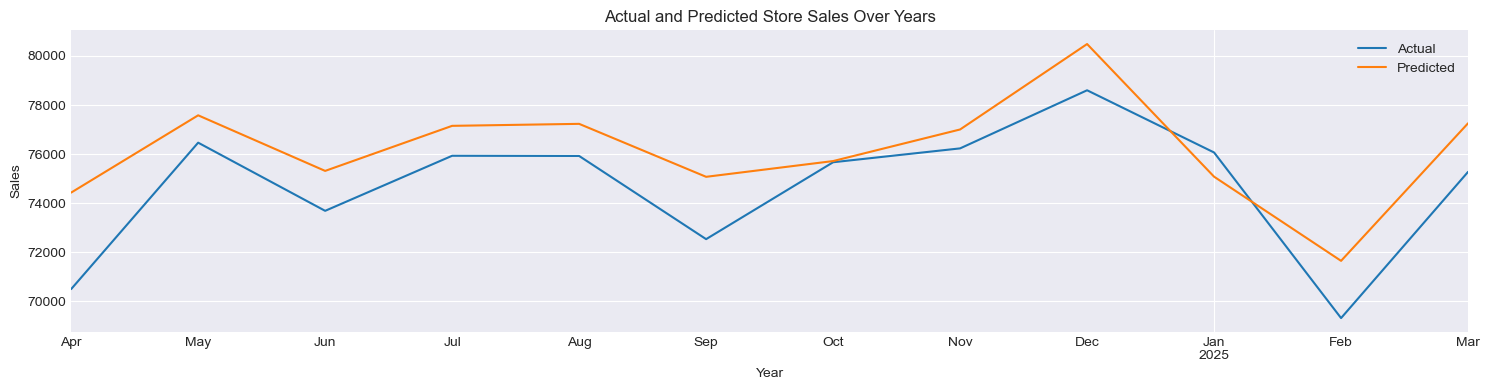

In [38]:
# plotting actual and predicted sales over years
plt.figure(figsize=(15,4))
actual_vs_pred_df["actual_sales"].plot()
actual_vs_pred_df["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(["Actual", "Predicted"])
plt.tight_layout()
plt.show()

Actual and Predicted sales for test data are somewhat close to each other.  SARIMAX model is giving decent predictions, so let’s try to build the model on the entire dataset.

# Training SARIMAX Model on Entire Data

In [31]:
# Passing non stationary data to auto_arima function
auto_arima_result = auto_arima(df,seasonal=True,m=12)

In [32]:
# Summary function will help to have closer look at statistical values
print(auto_arima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   51
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -325.575
Date:                            Sat, 14 Feb 2026   AIC                            657.151
Time:                                    14:52:47   BIC                            662.064
Sample:                                01-01-2021   HQIC                           658.899
                                     - 03-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0399      0.134      0.297      0.767      -0.223       0.303
ar.S.L24      -0.0585      0.058   

In [33]:
# Create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(df,order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

# Building SARIMAX model
model_fit=model_sarimax.fit()

C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\envs\py313new\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [34]:
# number of months to forecast
n_forecast = 12

# future predictions
pred_values = model_fit.forecast(steps=n_forecast)

# create future dates
future_dates = pd.date_range(
    start=df.index[-1] + pd.offsets.MonthBegin(1),
    periods=n_forecast,
    freq='MS'
)

# create dataframe
pred_df = pd.DataFrame({
    "predicted": pred_values
}, index=future_dates)

# round values
pred_df["predicted"] = pred_df["predicted"].round(0)

pred_df


,predicted
2025-04-01,71227.0
2025-05-01,77313.0
2025-06-01,74598.0
2025-07-01,76854.0
2025-08-01,76771.0
2025-09-01,73360.0
2025-10-01,76692.0
2025-11-01,77188.0
2025-12-01,79545.0
2026-01-01,77051.0


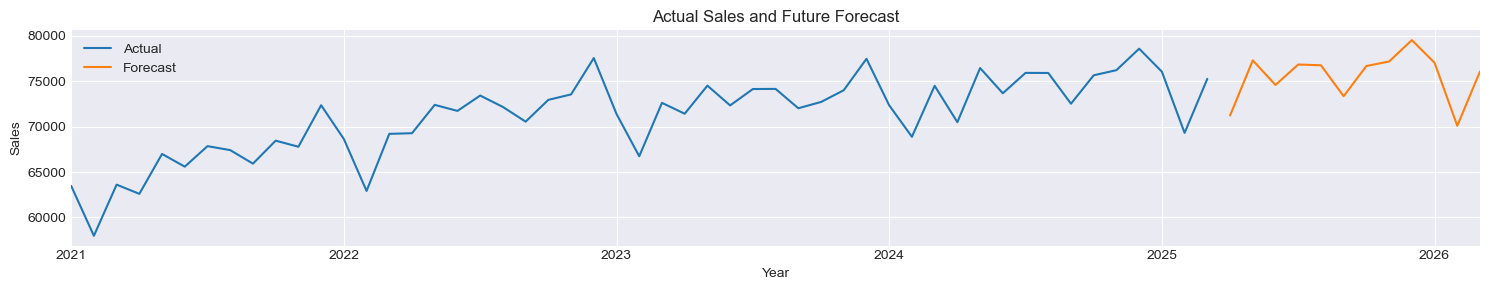

In [37]:
# Plotting actual and predicted sales over years
plt.figure(figsize=(15, 3))
df["sales"].plot(label="Actual")
pred_df["predicted"].plot(label="Forecast")
plt.title("Actual Sales and Future Forecast")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

SARIMAX model has captured the seasonality well, which was not captured by the ARIMA model.